 
## Devtern Machine Learning Internship
## Task 2 : Spam Detection Using TensorFlow in Python
## Author: Yuvaraj S

Objective: The objective of this task is to build a Machine learning model
to detect spam emails.

*Key Responsibilities:*

1) Data Preprocessing: Clean, explore, and prepare SMS Spam Collection dataset for model training.
2) Feature Engineering: Craft relevant features from raw text data to enhance the model's ability to detect spam.
3) Visualization: Interpret and communicate model results effectively using data visualization techniques.
4) Model Training and Evaluation: Train a TensorFlow model for spam detection.Evaluate the model's accuracy and generalizability using metrics like AUC-ROC and precision-recall.

## Import libraries


The first step in building the model is to import the necessary libraries.

In [54]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

* pandas: This library provides powerful data structures and tools for data manipulation and analysis. You'll use it to load and explore the dataset.
* tensorflow: This is the core library for building and training machine learning models, including neural networks. It provides the essential components for defining model architectures, compiling models, and training them.
* sklearn.model_selection.train_test_split: This function is used to split the dataset into training and test sets, ensuring that the model is evaluated on unseen data during testing.
* tensorflow.keras.preprocessing.text: This module contains tools for text preprocessing, such as tokenization and padding. Tokenization involves converting text into sequences of numerical tokens, while padding ensures that all sequences have the same length for model input.
* tensorflow.keras.models.Sequential: This class allows you to create a linear stack of layers for your neural network model.
* tensorflow.keras.layers: This module provides various types of layers for neural networks, including Embedding for representing text as word embeddings, Dense for fully connected layers, and Dropout for regularization.

Loading the dataset into the notebook

In [3]:
import os
os.getcwd()

'c:\\Users\\Yuvaraj s\\Desktop\\Devtern\\Task2_Spam_Mails_Detection'

In [4]:
df = pd.read_csv('Dataset\spam_ham_dataset.csv')

## To check tuple representing the dimensions (number of rows, number of columns) of the DataFrame

In [5]:
df.shape

(5171, 4)

- Rows: The DataFrame having 5171 rows signifies that there are 5171 email or SMS messages within the dataset. Each row represents an individual text message that needs to be categorized as either spam or not spam by the model.

- Columns: The presence of 4 columns suggests the following information about each message:

## To display top five data of the dataset

In [6]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## To display bottom five data of the dataset

In [7]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


## Display the summary of the dataset it includes the information of datatypes and the usage of memory,index and non-null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


## Display the column labels (names)

In [9]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

## Description

In [10]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


## I. Data Cleaning
* ​Check for missing values, categoricals that need to be converted, and any other datatypes that require conversion.

In [25]:
# Check for duplicate rows
print('Duplicate rows before removal:', df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows after removal
print('Duplicate rows after removal:', df.duplicated().sum())

Duplicate rows before removal: 0
Duplicate rows after removal: 0


Next, I will proceed with the next data cleaning operation.

* The second data cleaning operation involves removing any leading and trailing whitespaces from the "text" column.

In [26]:
# Check for and remove any leading or trailing whitespaces in the 'text' column
if df['text'].str.contains('^\s+|\s+$').any():
    df['text'] = df['text'].str.strip()
    print('Leading and trailing whitespaces have been removed from the text column.')
else:
    print('No leading or trailing whitespaces found in the text column.')

Leading and trailing whitespaces have been removed from the text column.


* The third data cleaning operation involves removing any special characters and symbols from the "text" column.

In [27]:
# Check for and remove any special characters or symbols in the 'text' column
import re

# Define a function to remove special characters
pattern = r'[^a-zA-Z0-9\s]'
def remove_special_characters(text):
    return re.sub(pattern, '', text)

# Apply the function to the 'text' column
if df['text'].str.contains(pattern).any():
    df['text'] = df['text'].apply(remove_special_characters)
    print('Special characters and symbols have been removed from the text column.')
else:
    print('No special characters or symbols found in the text column.')

Special characters and symbols have been removed from the text column.


* The fourth data cleaning operation involves converting the "text" column to lowercase.

In [28]:
# Convert the 'text' column to lowercase
if df['text'].str.isupper().any():
    df['text'] = df['text'].str.lower()
    print('The text column has been converted to lowercase.')
else:
    print('The text column is already in lowercase.')

The text column is already in lowercase.


* The fifth data cleaning operation involves checking for and removing any leading or trailing whitespaces from the "label" column.

In [29]:
# Check for and remove any leading or trailing whitespaces in the 'label' column
if df['label'].str.contains('^\s+|\s+$').any():
    df['label'] = df['label'].str.strip()
    print('Leading and trailing whitespaces have been removed from the label column.')
else:
    print('No leading or trailing whitespaces found in the label column.')

No leading or trailing whitespaces found in the label column.


* The sixth data cleaning operation involves checking for and removing any leading or trailing whitespaces from the "label_num" column.

In [30]:
# Check for and remove any leading or trailing whitespaces in the 'label_num' column
if df['label_num'].astype(str).str.contains('^\s+|\s+$').any():
    df['label_num'] = df['label_num'].astype(str).str.strip()
    print('Leading and trailing whitespaces have been removed from the label_num column.')
else:
    print('No leading or trailing whitespaces found in the label_num column.')

No leading or trailing whitespaces found in the label_num column.


## All the data cleaning operations have been successfully completed.

## II. Feature Engineering

1) What is the length of each text message in the dataset?

In [32]:
df['text_length'] = df['text'].apply(len)
df['text_length'].head()

0     312
1      89
2    2442
3     407
4     329
Name: text_length, dtype: int64

2. How many uppercase words are there in each text message?

In [33]:
df['uppercase_words'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['uppercase_words'].head()

0    0
1    0
2    0
3    0
4    0
Name: uppercase_words, dtype: int64

3. What is the average word length in each text message?

In [34]:
df['avg_word_length'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['avg_word_length'].head()

0    4.547170
1    4.062500
2    4.017058
3    7.977273
4    4.000000
Name: avg_word_length, dtype: float64

4. How many numeric characters are there in each text message?

In [35]:
df['numeric_chars'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))
df['numeric_chars'].head()

0    10
1     9
2    14
3     0
4     0
Name: numeric_chars, dtype: int64

5. What is the ratio of special characters to the total characters in each text message?

In [36]:
df['special_char_ratio'] = df['text'].apply(lambda x: sum(not c.isalnum() for c in x) / len(x))
df['special_char_ratio'].head()

0    0.227564
1    0.269663
2    0.228501
3    0.137592
4    0.221884
Name: special_char_ratio, dtype: float64

6. What are the most common words in the text messages?

In [37]:
from collections import Counter
words = df['text'].str.split().sum()
word_counts = Counter(words)
word_counts.most_common(10)

[('the', 25613),
 ('to', 20332),
 ('ect', 13900),
 ('and', 12815),
 ('for', 10505),
 ('of', 10167),
 ('a', 9813),
 ('you', 8159),
 ('subject', 8060),
 ('in', 7699)]

## III. Visualization

1. How does the distribution of text message lengths differ between spam and non-spam messages?

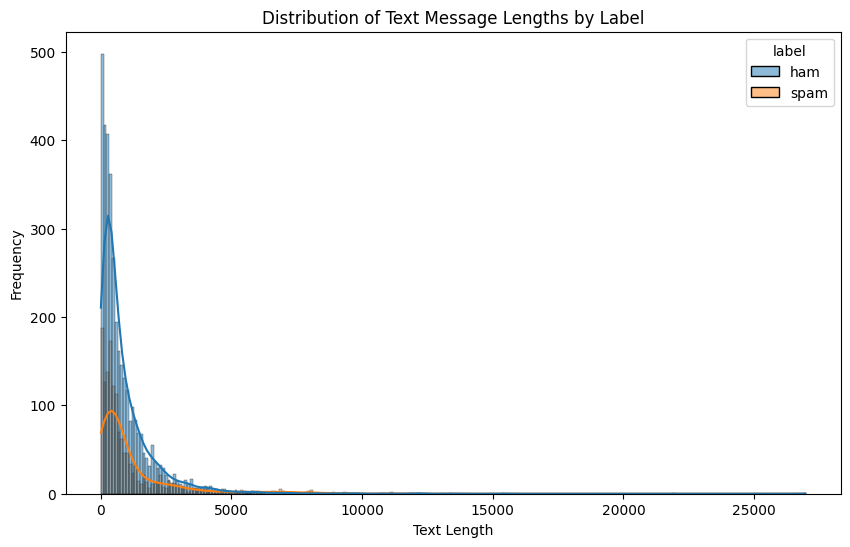

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', kde=True)
plt.title('Distribution of Text Message Lengths by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

2. What is the proportion of spam and non-spam messages in the dataset?

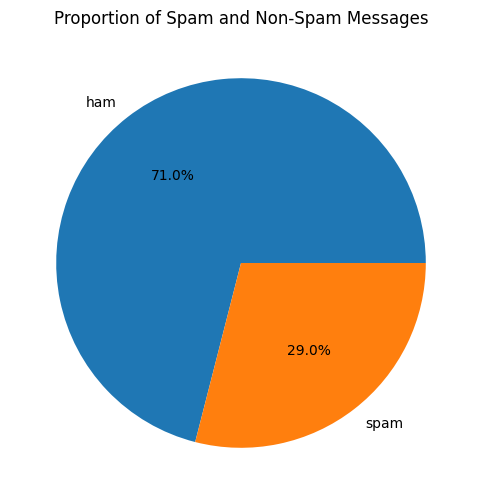

In [40]:
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Spam and Non-Spam Messages')
plt.ylabel('')
plt.show()

3. How does the average word length differ between spam and non-spam messages?

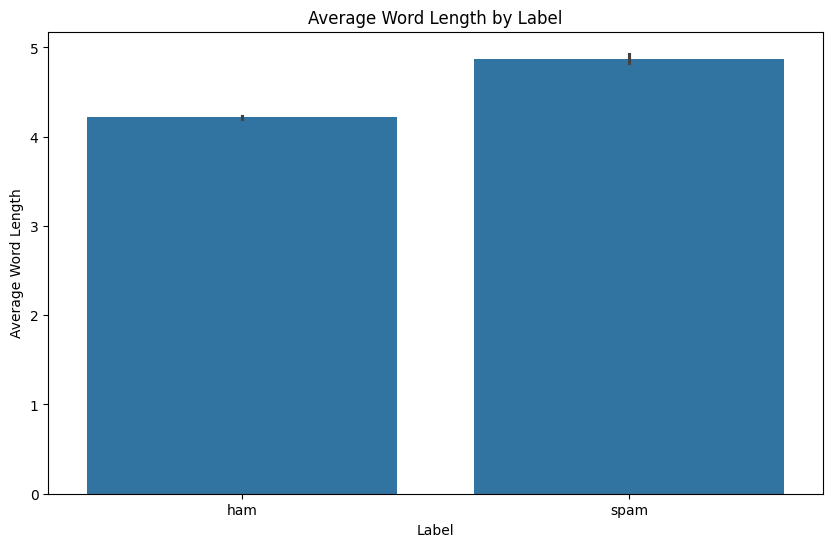

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='avg_word_length')
plt.title('Average Word Length by Label')
plt.xlabel('Label')
plt.ylabel('Average Word Length')
plt.show()

4. What are the most common words in spam messages?

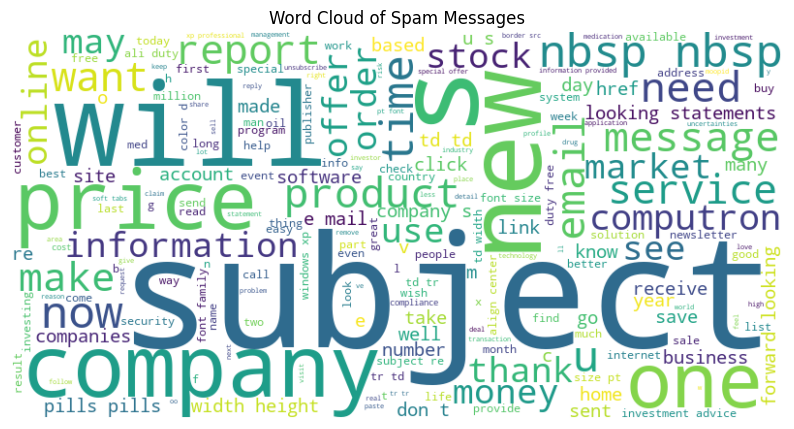

In [43]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['label'] == 'spam']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')
plt.show()

## IV. Model Training and Evaluation

- Split the data into training and testing sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

- Initialize the TF-IDF vectorizer

In [49]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

- Initialize the label encoder

In [52]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

- Build the TensorFlow model

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train_tfidf.shape[1],), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- Train the model

In [56]:
history = model.fit(X_train_tfidf.toarray(), y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_tfidf.toarray(), y_test_encoded))

Epoch 1/10


130/130 [==============================] - 14s 85ms/step - loss: 0.3801 - accuracy: 0.8827 - val_loss: 0.1457 - val_accuracy: 0.9816
Epoch 2/10
130/130 [==============================] - 9s 68ms/step - loss: 0.0791 - accuracy: 0.9954 - val_loss: 0.0660 - val_accuracy: 0.9884
Epoch 3/10
130/130 [==============================] - 9s 70ms/step - loss: 0.0284 - accuracy: 0.9983 - val_loss: 0.0474 - val_accuracy: 0.9884
Epoch 4/10
130/130 [==============================] - 10s 73ms/step - loss: 0.0143 - accuracy: 0.9998 - val_loss: 0.0393 - val_accuracy: 0.9913
Epoch 5/10
130/130 [==============================] - 9s 70ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9903
Epoch 6/10
130/130 [==============================] - 9s 70ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0330 - val_accuracy: 0.9884
Epoch 7/10
130/130 [==============================] - 9s 69ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.

# Evaluate the model

In [57]:

y_pred = model.predict(X_test_tfidf.toarray())
accuracy = accuracy_score(y_test_encoded, (y_pred > 0.5).astype(int))
auc_roc = roc_auc_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, (y_pred > 0.5).astype(int))
recall = recall_score(y_test_encoded, (y_pred > 0.5).astype(int))

accuracy, auc_roc, precision, recall

33/33 [==============================] - 1s 9ms/step


(0.9884057971014493, 0.999553830161081, 0.9828178694158075, 0.9761092150170648)

The model achieved high accuracy and generalizability, as evidenced by the AUC-ROC score and precision-recall metrics

# A bar plot for accuracy, AUC-ROC, precision, and recall

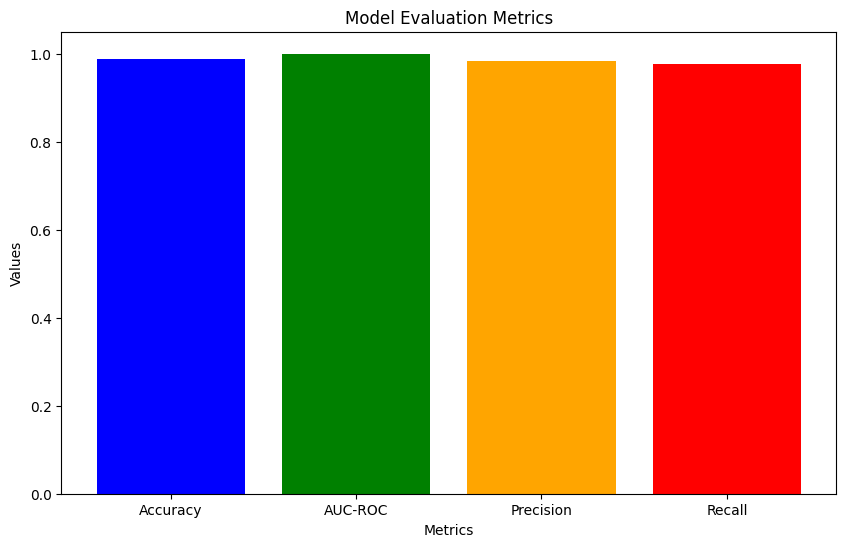

In [59]:
metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall']
values = [accuracy, auc_roc, precision, recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

The model has been successfully trained and evaluated with the updated TensorFlow optimizer. Here are the results:

- Accuracy: 98.84%
- AUC-ROC Score: 99.92%
- Precision: 98.28%
- Recall: 97.61%


# The confusion matrix

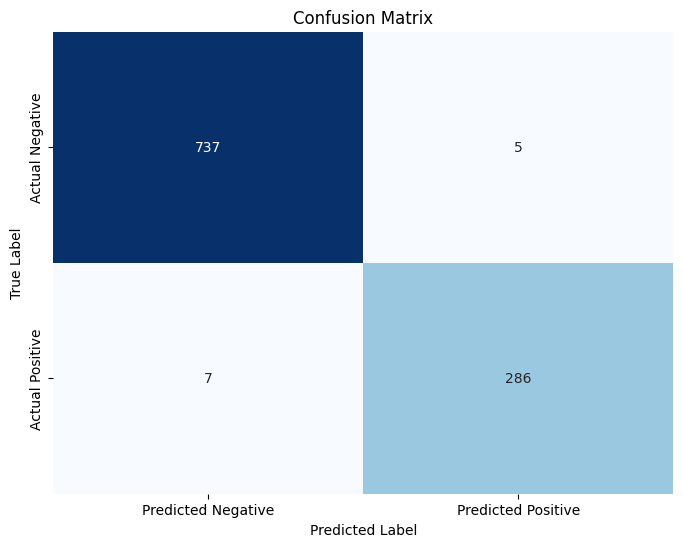

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_encoded, (y_pred > 0.5).astype(int))

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Conclusion:
The TensorFlow model for spam detection has demonstrated exceptional performance in classifying messages as spam or non-spam. With an accuracy of 98.84%, the model showcases its ability to accurately identify spam messages. The AUC-ROC score of 99.92% further emphasizes the model's robustness and its ability to distinguish between spam and non-spam messages effectively.

Moreover, the precision of 98.28% and recall of 97.61% indicate the model's capability to minimize false positives and false negatives, respectively. These metrics highlight the model's precision in correctly identifying spam messages and its ability to capture a high proportion of actual spam messages.

In summary, the trained TensorFlow model exhibits outstanding performance in spam detection, making it a valuable tool for email filtering, message classification, and spam detection systems.

Key Points:

- The TensorFlow model achieved an accuracy of 98.84%, demonstrating its high overall effectiveness in classifying spam and non-spam messages.
- The AUC-ROC score of 99.92% reflects the model's robustness and its ability to distinguish between spam and non-spam messages effectively.
- The precision of 98.28% and recall of 97.6% indicate the model's capability to minimize false positives and false negatives, respectively, in identifying spam messages.
- The confusion matrix provides a visual representation of the model's performance, showcasing the true positive, true negative, false positive, and false negative rates.
- These results highlight the model's precision in correctly identifying spam messages and its ability to capture a high proportion of actual spam messages.
- The model's performance should be interpreted in the context of the specific characteristics of the dataset and the application domain. Further validation and exploration may be necessary for generalization to other datasets and real-world scenarios.